1. EDA - Bike Details 

In [2]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('BIKE DETAILS.csv')

In [6]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [8]:
#Q1. What is the range of selling prices in the dataset

range = df['selling_price'].max() - df['selling_price'].min()
range

755000

In [10]:
#Q2. What is the median selling price for bikes in the datasetD

median = df['selling_price'].median()
median

45000.0

In [12]:
#Q3. What is the most common seller type?

mode = df['seller_type'].mode()[0]
print("Most Common seller type: ", mode)

Most Common seller type:  Individual


In [14]:
#Q4.  How many bikes have driven more than 50,000 kilometers?

df[df['km_driven']>50000].shape[0]

170

In [58]:
#Q5. What is the average km_driven value for each ownership type?

average_km_by_owner = df.groupby('owner')['km_driven'].mean().reset_index()
average_km_by_owner.columns = ['Ownership Type', 'Average KM Driven']
average_km_by_owner

,Ownership Type,Average KM Driven
0,1st owner,32816.583333
1,2nd owner,39288.991870
2,3rd owner,33292.181818
3,4th owner,311500.000000


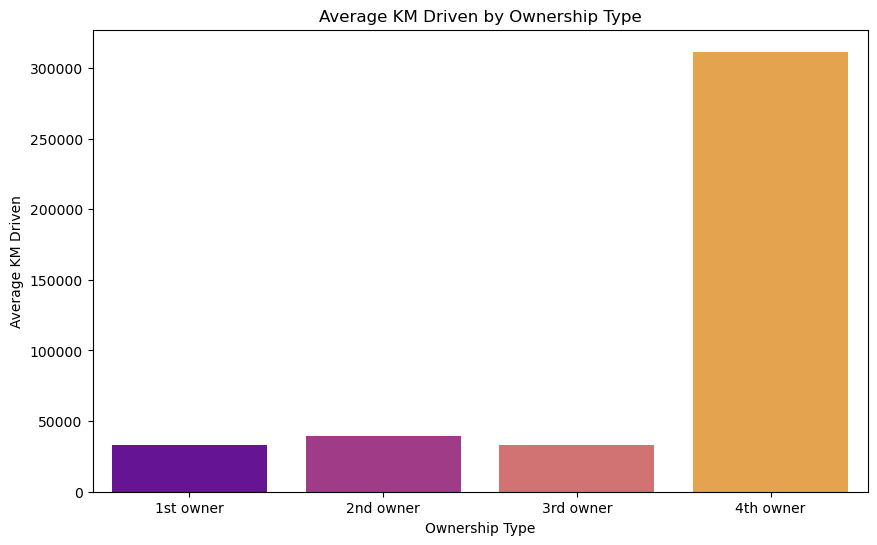

In [68]:
plt.figure(figsize = (10,6))
sns.barplot( x = 'Ownership Type', y = 'Average KM Driven', data = average_km_by_owner, palette = 'plasma' )
plt.xlabel('Ownership Type')
plt.ylabel('Average KM Driven')
plt.title('Average KM Driven by Ownership Type')
plt.show()

In [86]:
#Q6. What proportion of bikes are from the year 2015 or older

#Total no of bikes
total_bikes = len(df)

#Bikes from 2015 or older
count_bikes_2015_or_older = len(df[df['year'] <= 2015])

#proportion
Proportion = (count_bikes_2015_or_older / total_bikes) * 100

Proportion

56.64467483506126

In [96]:
#Q7. What is the trend of missing values across the dataset

# Count missing values in each column
missing_values = df.isnull().sum().sort_values(ascending=False)

# Filter columns that have missing values
missing_values = missing_values[missing_values > 0]

missing_values

ex_showroom_price    435
dtype: int64

In [110]:
#Q8. What is the highest ex_showroom_price recorded, and for which bike

max_price = df['ex_showroom_price'].max()
most_expensive_bike = df[df['ex_showroom_price'] == max_price].reset_index()
print(f"Highest Ex-Showroom Price: ₹{max_price:,.2f}")
print("Bike(s) with this price:")
print(most_expensive_bike[['name', 'ex_showroom_price']])

Highest Ex-Showroom Price: ₹1,278,000.00
Bike(s) with this price:
                         name  ex_showroom_price
0  Harley-Davidson Street Bob          1278000.0


In [134]:
#Q9. What is the total number of bikes listed by each seller type

seller_counts = df['seller_type'].value_counts()

seller_counts


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

<Axes: ylabel='count'>

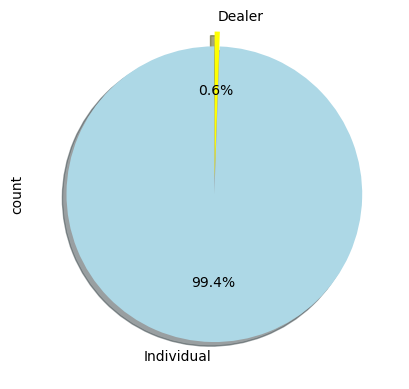

In [146]:


df['seller_type'].value_counts().plot.pie(autopct = '%1.1f%%', colors = ['lightblue', 'yellow'], explode = (0, 0.1), startangle = 90, shadow = True)

In [160]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes
first_owner = df[df['owner'] == '1st owner']
first_owner = first_owner[['selling_price', 'km_driven']].head()
first_owner

,selling_price,km_driven
0,175000,350
1,45000,5650
2,150000,12000
3,65000,23000
5,18000,60000


<Axes: xlabel='km_driven', ylabel='selling_price'>

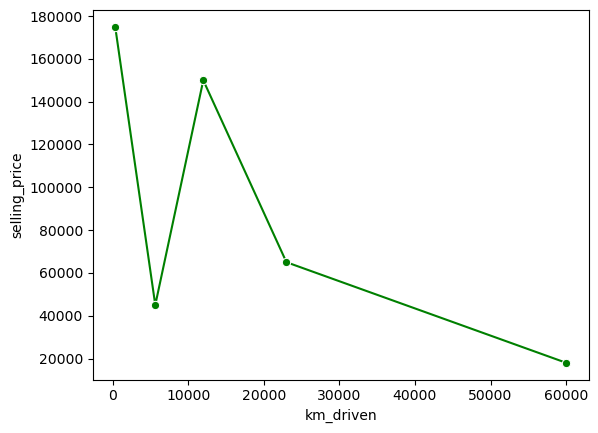

In [174]:
sns.lineplot(x = 'km_driven', y = 'selling_price', data = first_owner, color = 'green', marker = 'o')

In [176]:
#11. Identify and remove outliers in the km_driven column using the IQR method

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print(f"Original dataset size: {len(df)}")
print(f"Dataset size after removing outliers: {len(filtered_df)}")

Original dataset size: 1061
Dataset size after removing outliers: 1022


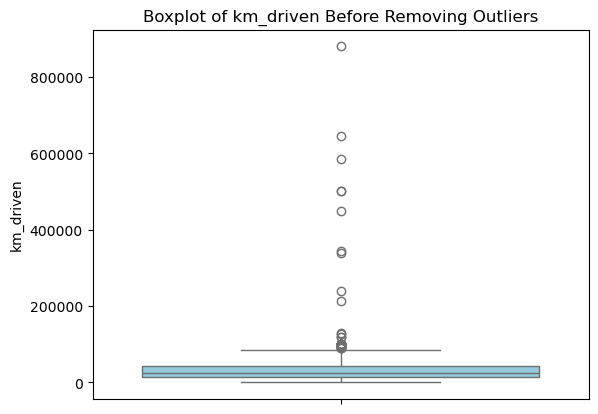

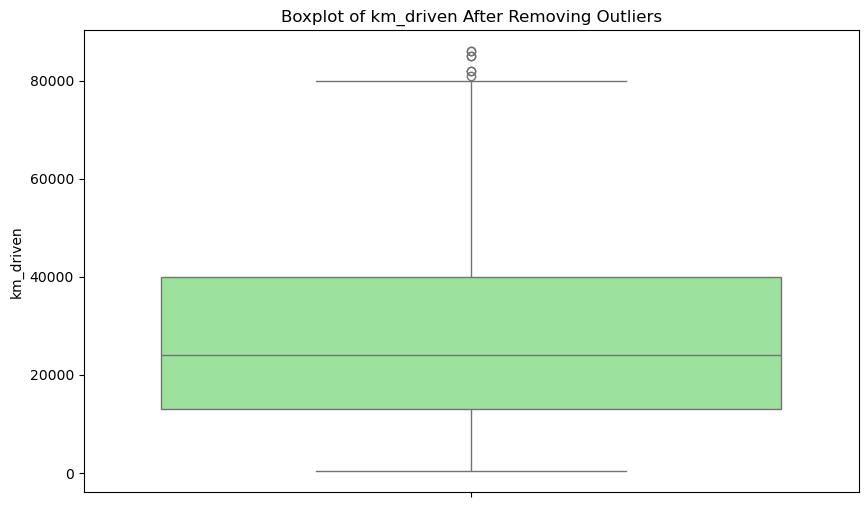

In [186]:
sns.boxplot(df['km_driven'], color='skyblue')
plt.title('Boxplot of km_driven Before Removing Outliers')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(filtered_df['km_driven'], color='lightgreen')
plt.title('Boxplot of km_driven After Removing Outliers')
plt.show()

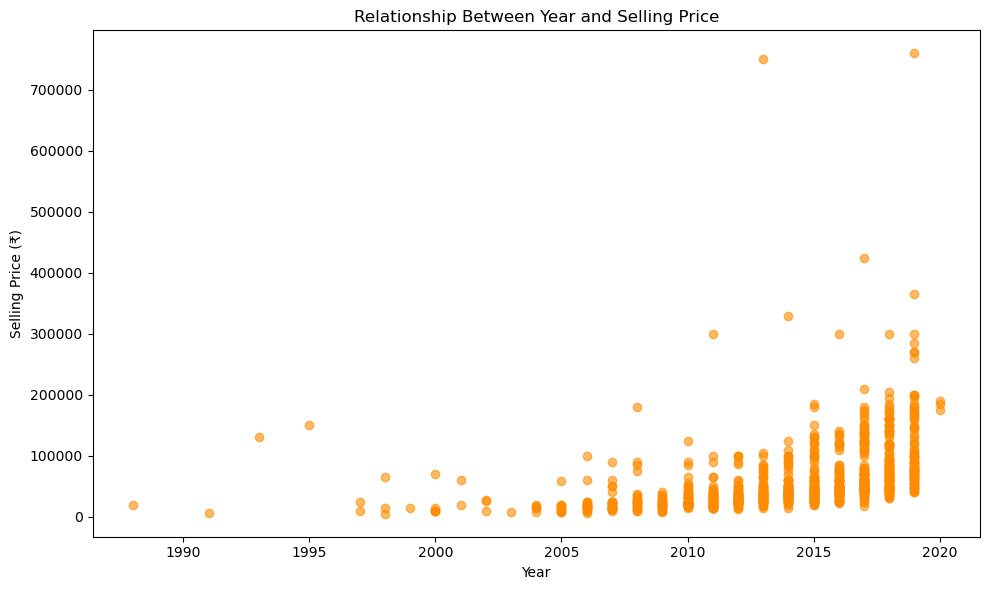

In [210]:
#Q12. Perform a bivariate analysis to visualize the relationship between year and selling_price

plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['selling_price'], alpha=0.6, color='darkorange')
plt.title('Relationship Between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price (₹)')
plt.tight_layout()
plt.show()

In [216]:
#Q13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)

current_year = 2025
df['age'] = current_year - df['year']

avg_depreciation_by_age = df.groupby('age')['selling_price'].mean().reset_index()

avg_depreciation_by_age

,age,selling_price
0,5,183333.333333
1,6,119689.511628
2,7,87660.374046
3,8,78894.736842
4,9,58469.018692
5,10,56500.000000
6,11,48668.131868
7,12,51136.986301
8,13,35748.400000
9,14,35655.721311


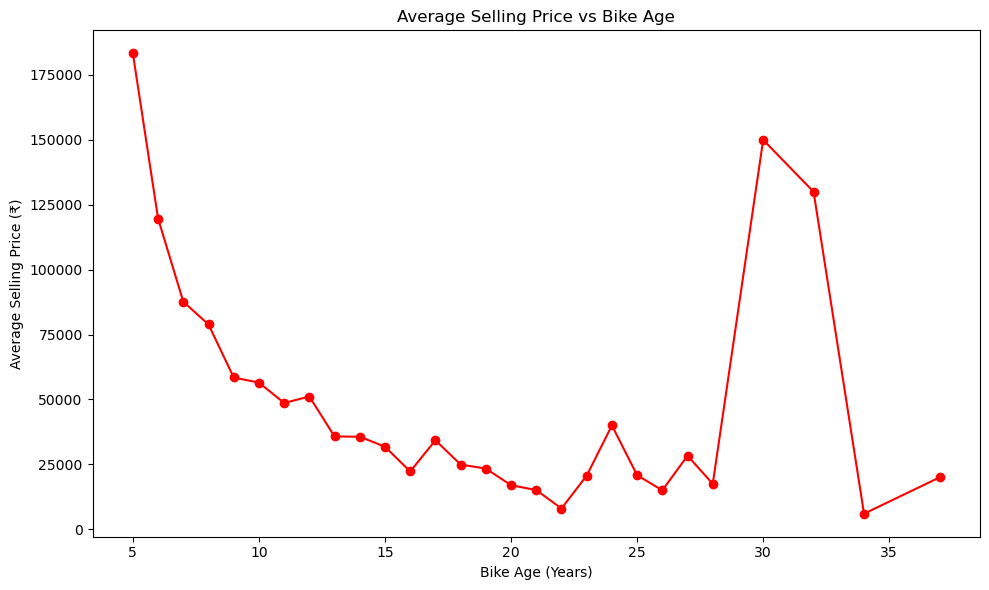

In [222]:
plt.figure(figsize=(10, 6))
plt.plot(avg_depreciation_by_age['age'], avg_depreciation_by_age['selling_price'], marker='o', color='red')
plt.title('Average Selling Price vs Bike Age')
plt.xlabel('Bike Age (Years)')
plt.ylabel('Average Selling Price (₹)')
plt.tight_layout()
plt.show()

In [246]:
#Q14. Which bike names are priced significantly above the average price for their manufacturing year

avg_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()
avg_price_by_year.columns = ['year', 'avg_selling_price']

df = pd.merge(df, avg_price_by_year, on='year', how='left')
threshold_factor = 1.2 

df['is_significantly_above'] = df['selling_price'] > (df['avg_selling_price'] * threshold_factor)

significantly_above_bikes = df[df['is_significantly_above']]

print(significantly_above_bikes[['name', 'selling_price', 'year', 'avg_selling_price']])

                                      name  selling_price  year  \
0                Royal Enfield Classic 350         175000  2019   
2      Royal Enfield Classic Gunmetal Grey         150000  2018   
7     Royal Enfield Bullet 350 [2007-2011]         180000  2008   
13                           Yamaha YZF R3         365000  2019   
17                        Yamaha YZF R15 S          40000  2010   
...                                    ...            ...   ...   
984              Royal Enfield Classic 500          95000  2014   
985              Royal Enfield Classic 500          90000  2011   
1005                    TVS Apache RTR 160          60000  2014   
1008                    Bajaj Pulsar 220 F          52000  2012   
1023                Bajaj Avenger 220 dtsi          45000  2012   

      avg_selling_price  
0         119689.511628  
2          87660.374046  
7          34289.285714  
13        119689.511628  
17         31793.333333  
...                 ...  
984        48

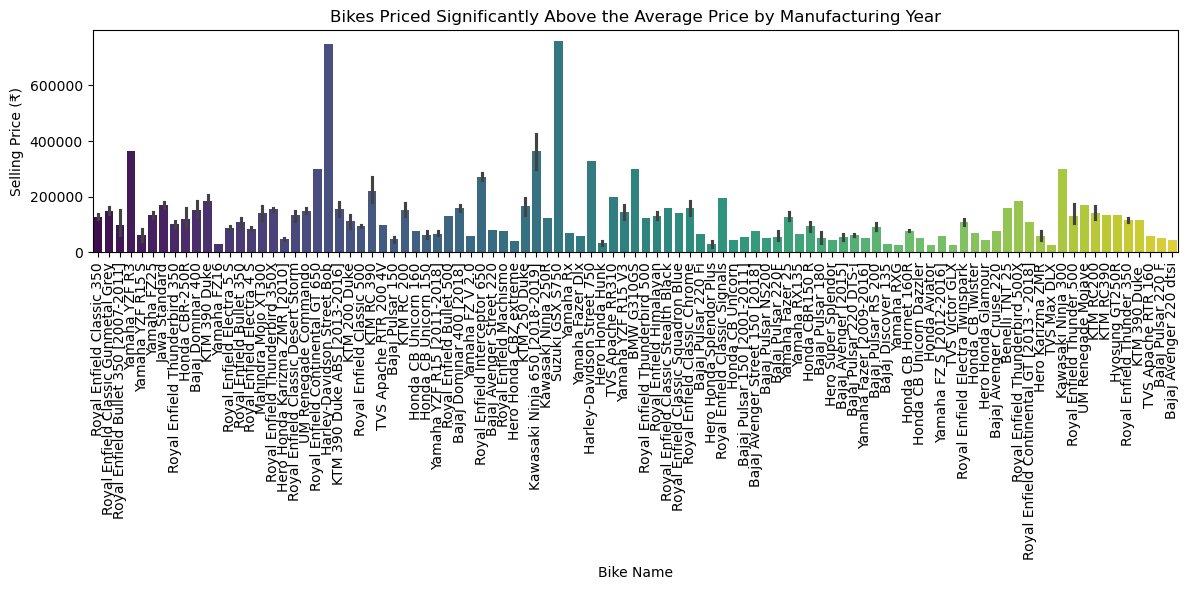

In [252]:
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='selling_price', data=significantly_above_bikes, palette='viridis')

# Adding title and labels
plt.title('Bikes Priced Significantly Above the Average Price by Manufacturing Year')
plt.xlabel('Bike Name')
plt.ylabel('Selling Price (₹)')
plt.xticks(rotation=90)  # Rotate bike names for better readability
plt.tight_layout()
plt.show()


In [224]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,6
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,8
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,7
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,10
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,14
...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0,15
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0,13
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0,12
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0,16


In [254]:
#Q15. correlation_matrix = df[numeric_columns].corr()

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()
correlation_matrix 

,selling_price,year,km_driven,ex_showroom_price,age,avg_selling_price_x,avg_selling_price_y,avg_selling_price
selling_price,1.000000,0.402188,-0.212937,0.918583,-0.402188,0.501140,0.501140,0.501140
year,0.402188,1.000000,-0.288675,0.126378,-1.000000,0.802547,0.802547,0.802547
km_driven,-0.212937,-0.288675,1.000000,-0.122011,0.288675,-0.309402,-0.309402,-0.309402
ex_showroom_price,0.918583,0.126378,-0.122011,1.000000,-0.126378,0.146598,0.146598,0.146598
age,-0.402188,-1.000000,0.288675,-0.126378,1.000000,-0.802547,-0.802547,-0.802547
avg_selling_price_x,0.501140,0.802547,-0.309402,0.146598,-0.802547,1.000000,1.000000,1.000000
avg_selling_price_y,0.501140,0.802547,-0.309402,0.146598,-0.802547,1.000000,1.000000,1.000000
avg_selling_price,0.501140,0.802547,-0.309402,0.146598,-0.802547,1.000000,1.000000,1.000000


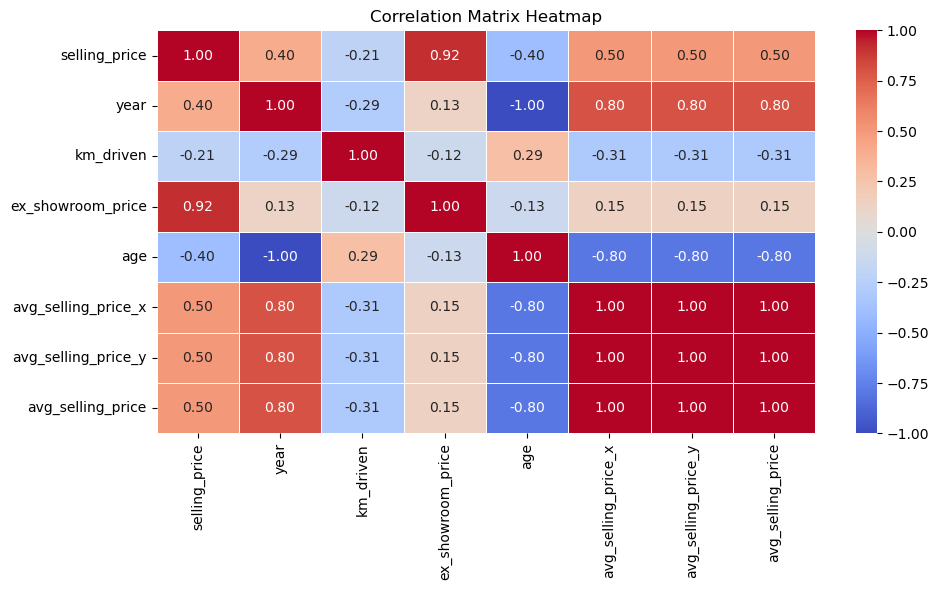

In [256]:
# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Adding title
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


EDA - 2 - Car Sale Dataset

In [262]:
df = pd.read_csv('Car Sale.csv')
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [264]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [270]:
#changing the data type into date time 

df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0       2022-01-02
1       2022-01-02
2       2022-01-02
3       2022-01-02
4       2022-01-02
           ...    
23901   2023-12-31
23902   2023-12-31
23903   2023-12-31
23904   2023-12-31
23905   2023-12-31
Name: Date, Length: 23906, dtype: datetime64[ns]

In [278]:
#Q1. What is the average selling price of cars for each dealer, and how does it compare across different dealers

avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().reset_index()
avg_price_by_dealer

,Dealer_Name,Price ($)
0,Buddy Storbeck's Diesel Service Inc,27217.261563
1,C & M Motors Inc,28111.755200
2,Capitol KIA,28189.703822
3,Chrysler Plymouth,27555.526400
4,Chrysler of Tri-Cities,28123.091054
5,Classic Chevy,28602.014446
6,Clay Johnson Auto Sales,27816.027113
7,Diehl Motor CO Inc,27993.929487
8,Enterprise Rent A Car,28312.580800
9,Gartner Buick Hyundai Saab,28247.621019


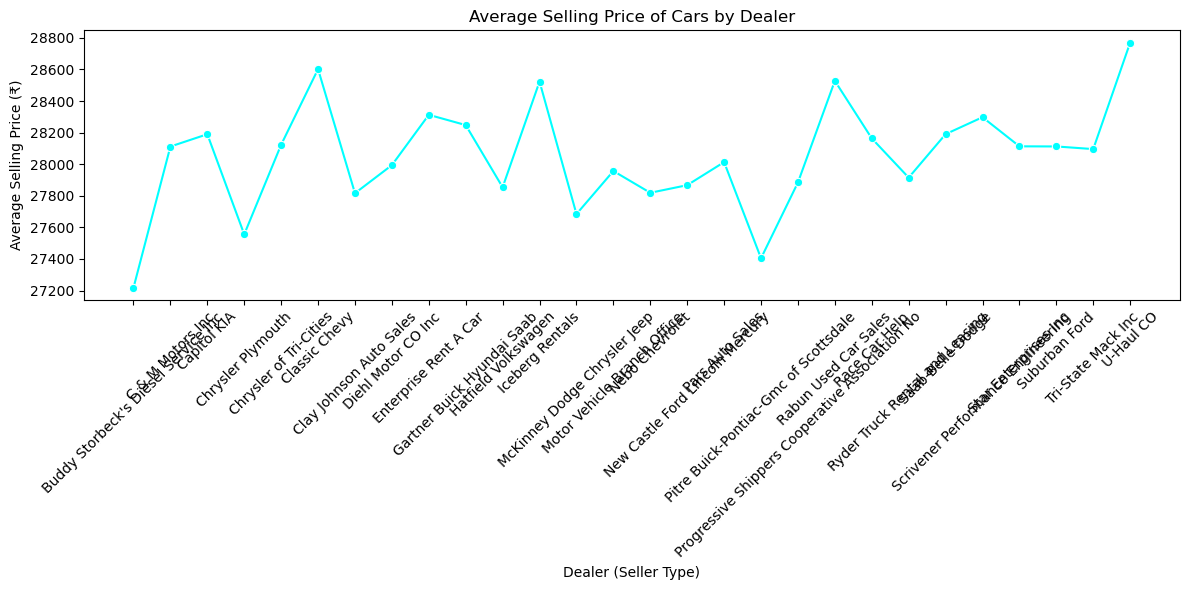

In [292]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Dealer_Name', y='Price ($)', data=avg_price_by_dealer, color = 'aqua', marker='o')


plt.title('Average Selling Price of Cars by Dealer')
plt.xlabel('Dealer (Seller Type)')
plt.ylabel('Average Selling Price (₹)')
plt.xticks(rotation=45)  # Rotate dealer names for better readability
plt.tight_layout()
plt.show()

In [298]:
#Q2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends

price_variation_by_brand = df.groupby('Company')['Price ($)'].std().reset_index()

max_variation_brand = price_variation_by_brand.loc[price_variation_by_brand['Price ($)'].idxmax()]
max_variation_brand

Company           Lincoln
Price ($)    19658.050211
Name: 15, dtype: object

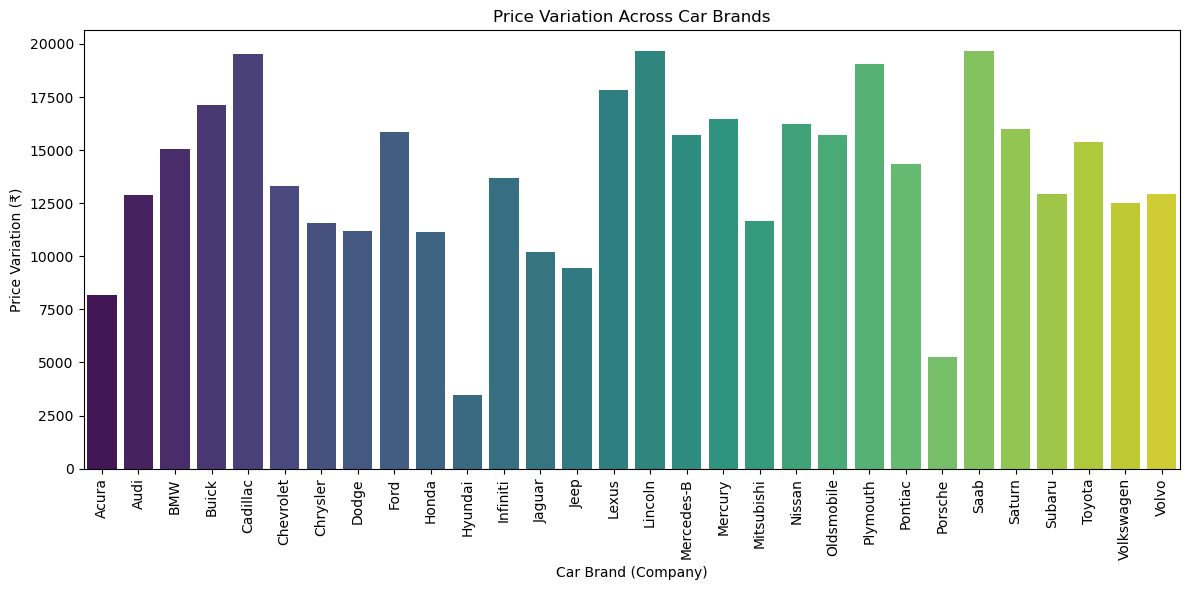

In [302]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Company', y='Price ($)', data=price_variation_by_brand, palette='viridis')

# Adding title and labels
plt.title('Price Variation Across Car Brands')
plt.xlabel('Car Brand (Company)')
plt.ylabel('Price Variation (₹)')
plt.xticks(rotation=90)  # Rotate car brand names for better readability
plt.tight_layout()
plt.show()

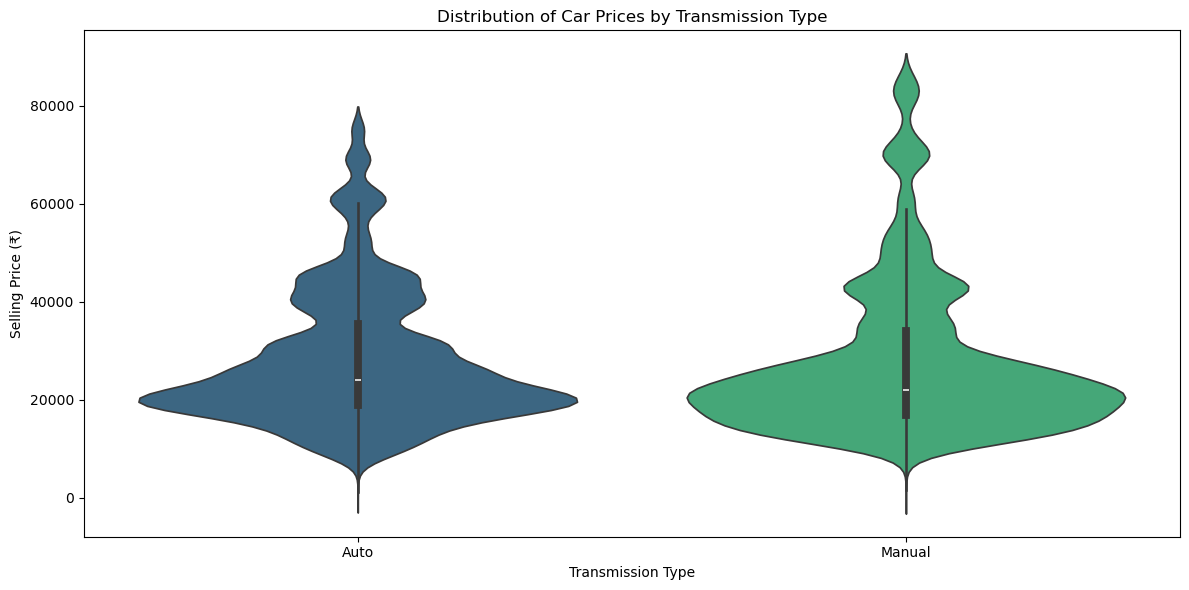

In [320]:
#Q3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare

plt.figure(figsize=(12, 6))
sns.violinplot(x='Transmission', y='Price ($)', data=df, palette='viridis')

# Adding title and labels
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price (₹)')
plt.tight_layout()
plt.show()

In [304]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Date '],
      dtype='object')

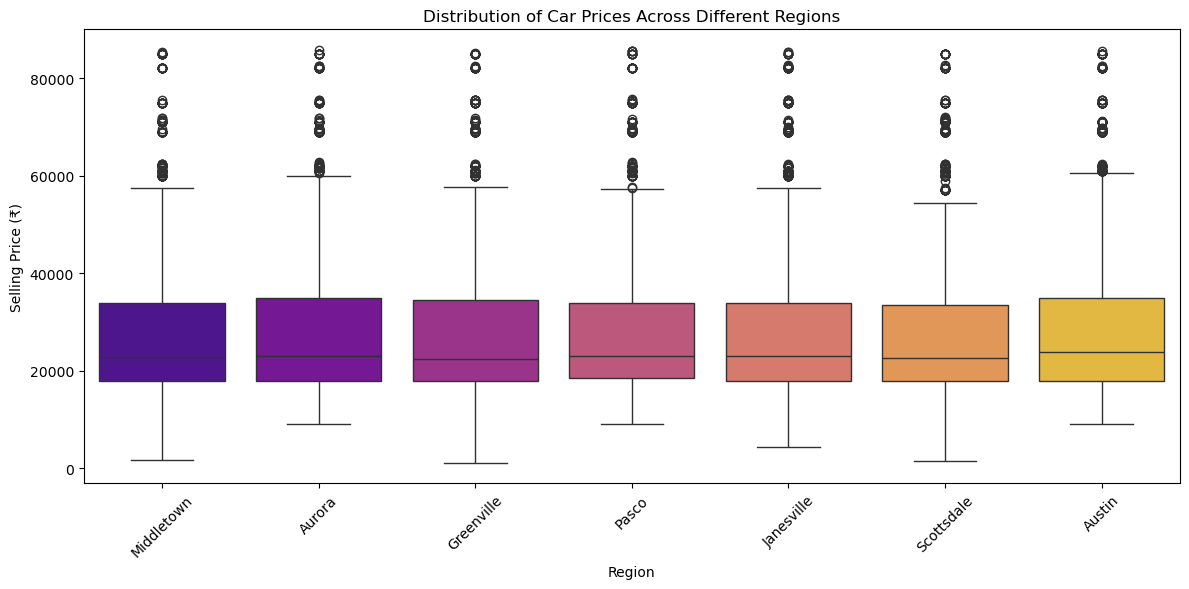

In [322]:
#Q4. What is the distribution of car prices across different regions

plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, palette='plasma')

# Adding title and labels
plt.title('Distribution of Car Prices Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Selling Price (₹)')
plt.xticks(rotation=45)  # Rotate region names for better readability
plt.tight_layout()
plt.show()

In [324]:
#Q5. What is the distribution of cars based on body styles

body_style_distribution = df['Body Style'].value_counts()
body_style_distribution

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64

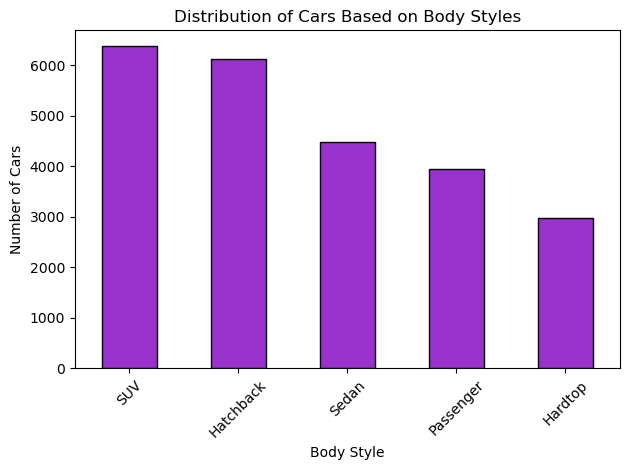

In [328]:
body_style_distribution.plot(kind='bar', color='darkorchid', edgecolor='black')
plt.title("Distribution of Cars Based on Body Styles")
plt.xlabel("Body Style")
plt.ylabel("Number of Cars")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [334]:
#Q5. How does the average selling price of cars vary by customer gender and annual income

# Define income bins
bins = [0, 30000, 60000, 90000, 120000, 150000, df['Annual Income'].max()]
labels = ['<30k', '30k-60k', '60k-90k', '90k-120k', '120k-150k', '150k+']

# Create new binned column
df['Income Group'] = pd.cut(df['Annual Income'], bins=bins, labels=labels)

# Group by both Gender and Income Group
avg_price_by_gender_income = df.groupby(['Gender', 'Income Group'])['Price ($)'].mean().unstack()
avg_price_by_gender_income


Income Group,<30k,30k-60k,60k-90k,90k-120k,120k-150k,150k+
Gender,,,,,,
Female,28132.038732,NaN,NaN,46001.0,20000.000000,28316.441814
Male,27816.302247,NaN,43000.0,NaN,16666.666667,28103.754282


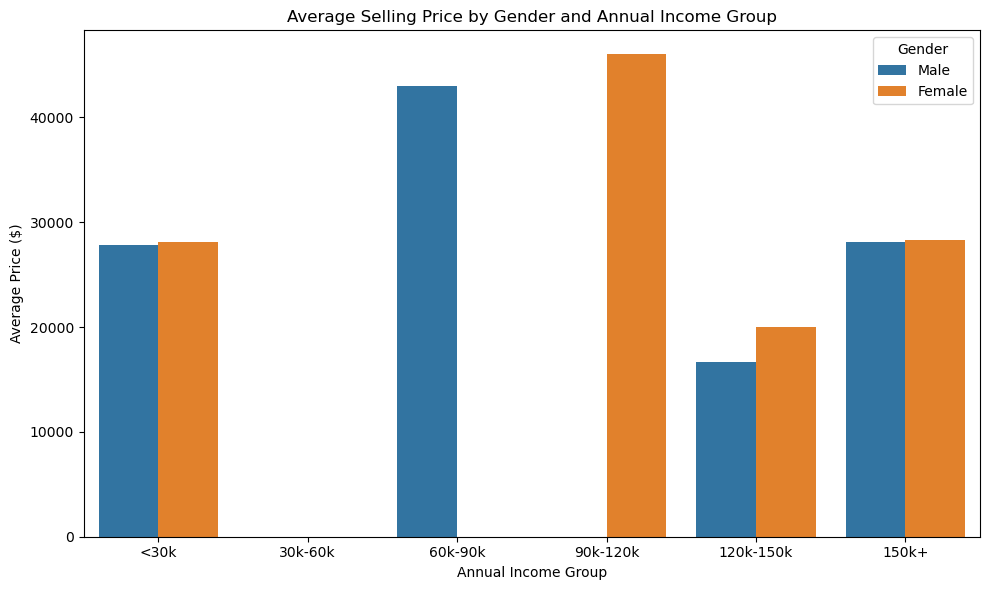

In [336]:
# Barplot of average price by Gender and Income Group
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Income Group', y='Price ($)', hue='Gender', estimator='mean', ci=None)
plt.title('Average Selling Price by Gender and Annual Income Group')
plt.xlabel('Annual Income Group')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()


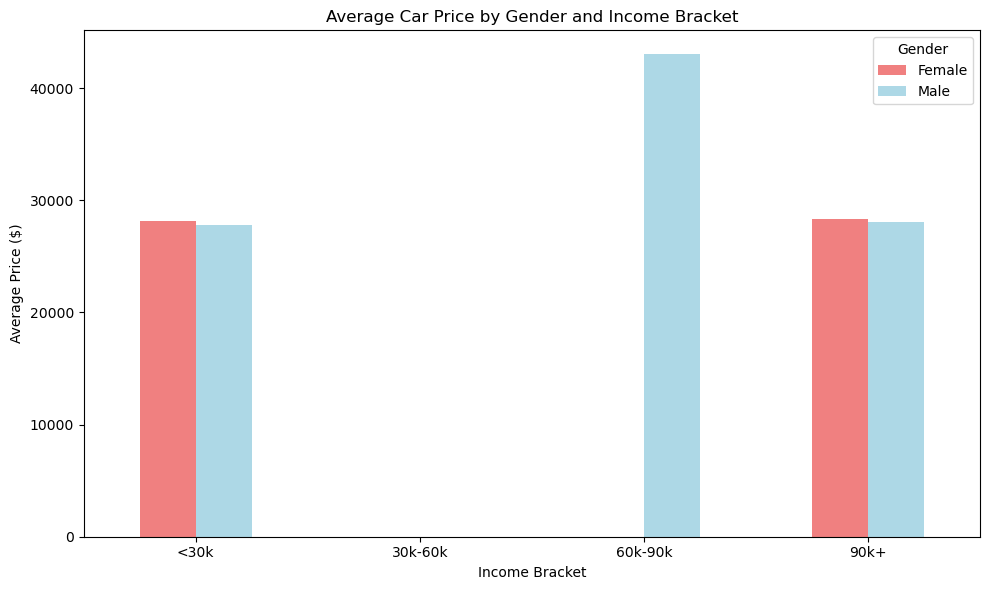

In [360]:
#6. How does the average selling price of cars vary by customer gender and annual income

bins = [0, 30000, 60000, 90000, float('inf')]
labels = ['<30k', '30k-60k', '60k-90k', '90k+']
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels)

grouped = df.groupby(['Gender', 'Income Bracket'])['Price ($)'].mean().reset_index()

pivot = grouped.pivot(index='Income Bracket', columns='Gender', values='Price ($)')

# Plot
pivot.plot(kind='bar', figsize=(10,6), color=['lightcoral', 'lightblue'])
plt.title("Average Car Price by Gender and Income Bracket")
plt.ylabel("Average Price ($)")
plt.xlabel("Income Bracket")
plt.xticks(rotation=0)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


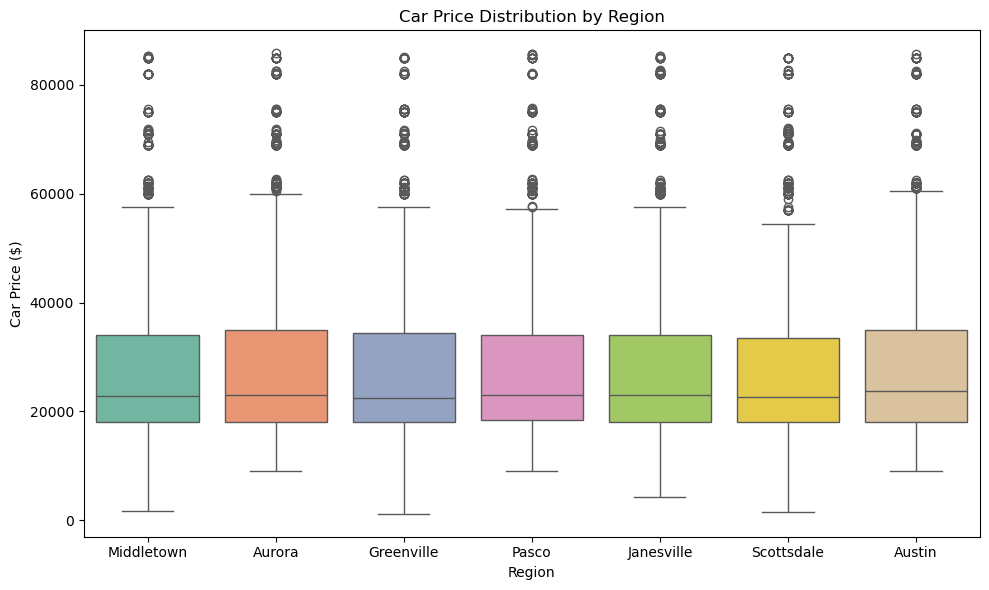

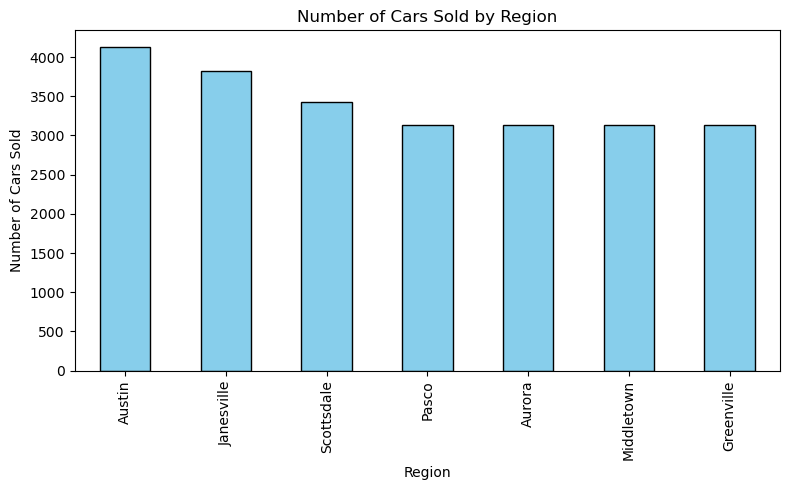

In [362]:
#7.What is the distribution of car prices by region, and how does the number of cars sold vary by region


# --- 1. Distribution of Car Prices by Region ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)', palette="Set2")
plt.title("Car Price Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Car Price ($)")
plt.tight_layout()
plt.show()

# --- 2. Number of Cars Sold by Region ---
plt.figure(figsize=(8, 5))
df['Dealer_Region'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Cars Sold by Region")
plt.xlabel("Region")
plt.ylabel("Number of Cars Sold")
plt.tight_layout()
plt.show()

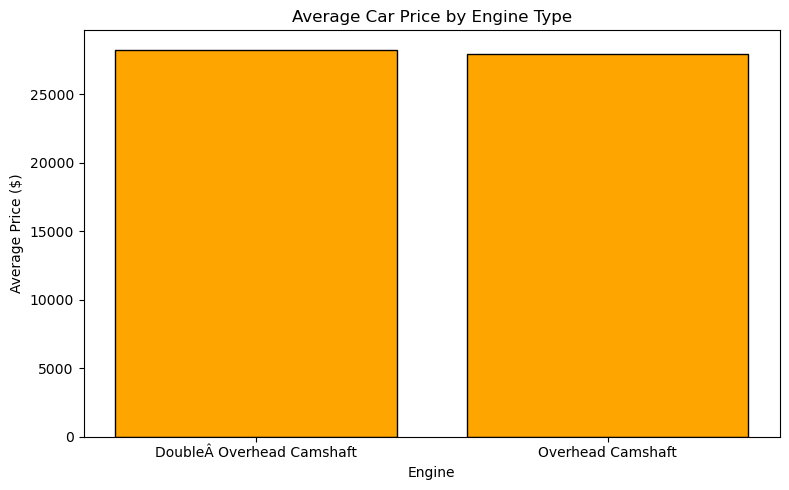

In [376]:
#8.How does the average car price differ between cars with different engine sizes

avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean().reset_index()

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(avg_price_by_engine['Engine'], avg_price_by_engine['Price ($)'], color='orange', edgecolor='black')
plt.title("Average Car Price by Engine Type")
plt.xlabel("Engine")
plt.ylabel("Average Price ($)")
plt.tight_layout()
plt.show()

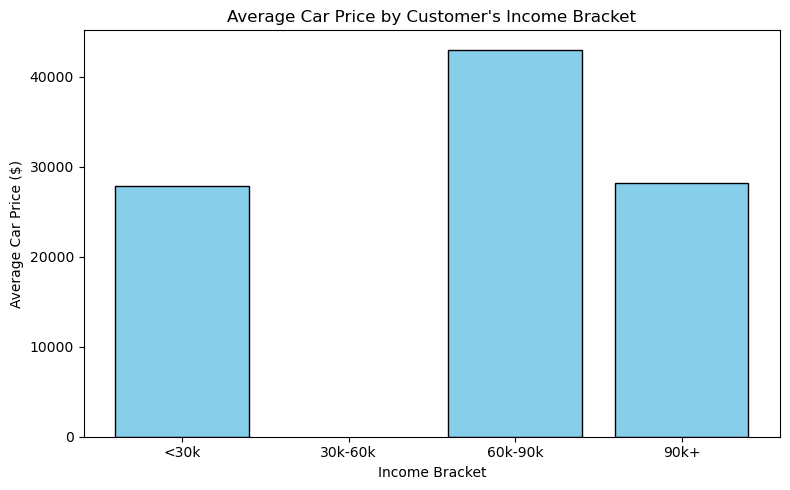

In [358]:
#9. How do car prices vary based on the customer’s annual income bracket


bins = [0, 30000, 60000, 90000, float('inf')]
labels = ['<30k', '30k-60k', '60k-90k', '90k+']
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels)

avg_price_by_bracket = df.groupby('Income Bracket')['Price ($)'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(avg_price_by_bracket['Income Bracket'], avg_price_by_bracket['Price ($)'], color='skyblue', edgecolor='black')
plt.title("Average Car Price by Customer's Income Bracket")
plt.xlabel("Income Bracket")
plt.ylabel("Average Car Price ($)")
plt.tight_layout()
plt.show()


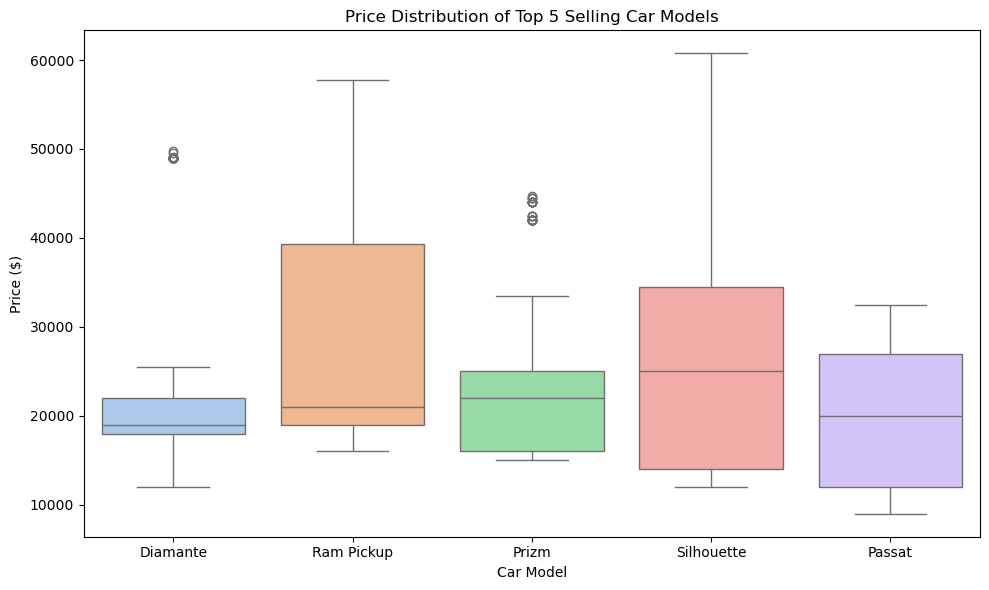

In [356]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look


top_models = df['Model'].value_counts().head(5).index.tolist()


top_df = df[df['Model'].isin(top_models)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=top_df, x='Model', y='Price ($)', palette="pastel")
plt.title("Price Distribution of Top 5 Selling Car Models")
plt.xlabel("Car Model")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()


In [354]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price variation

# Convert Engine to numeric engine size (e.g., "I4" → 4)
df['Engine Size'] = df['Engine'].str.extract('(\d+)').astype(float)


price_variation = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("Price Variation (Standard Deviation) by Color:")
print(price_variation)


Price Variation (Standard Deviation) by Color:
Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


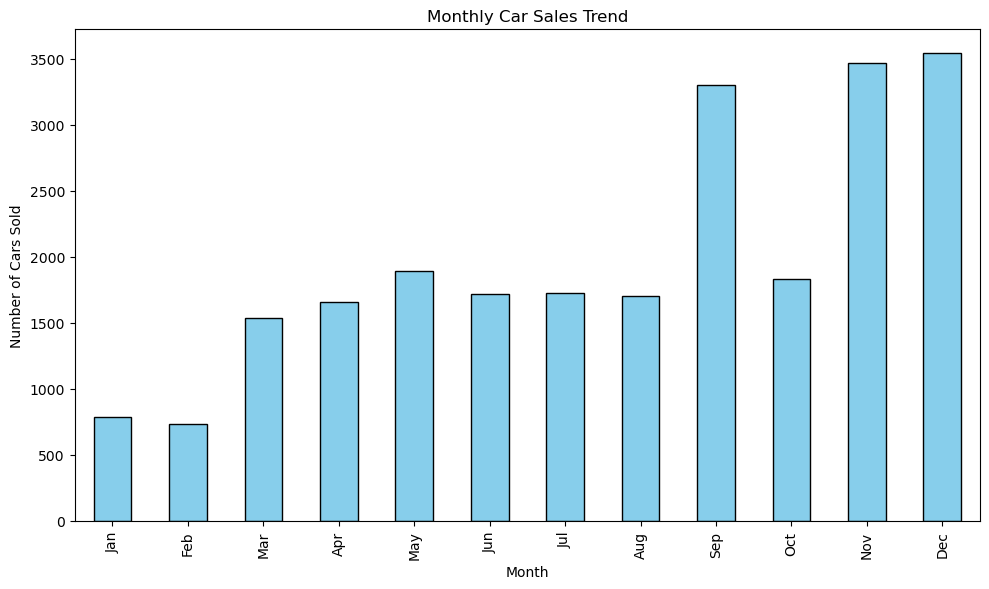

In [350]:
#12.Is there any seasonal trend in car sales based on the date of sale

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month from the date
df['Month'] = df['Date'].dt.month

# Count number of sales per month
monthly_sales = df['Month'].value_counts().sort_index()

# Optional: Map numeric months to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sales.index = [month_names[i-1] for i in monthly_sales.index]

# Plot the trend
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Monthly Car Sales Trend")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.tight_layout()
plt.show()


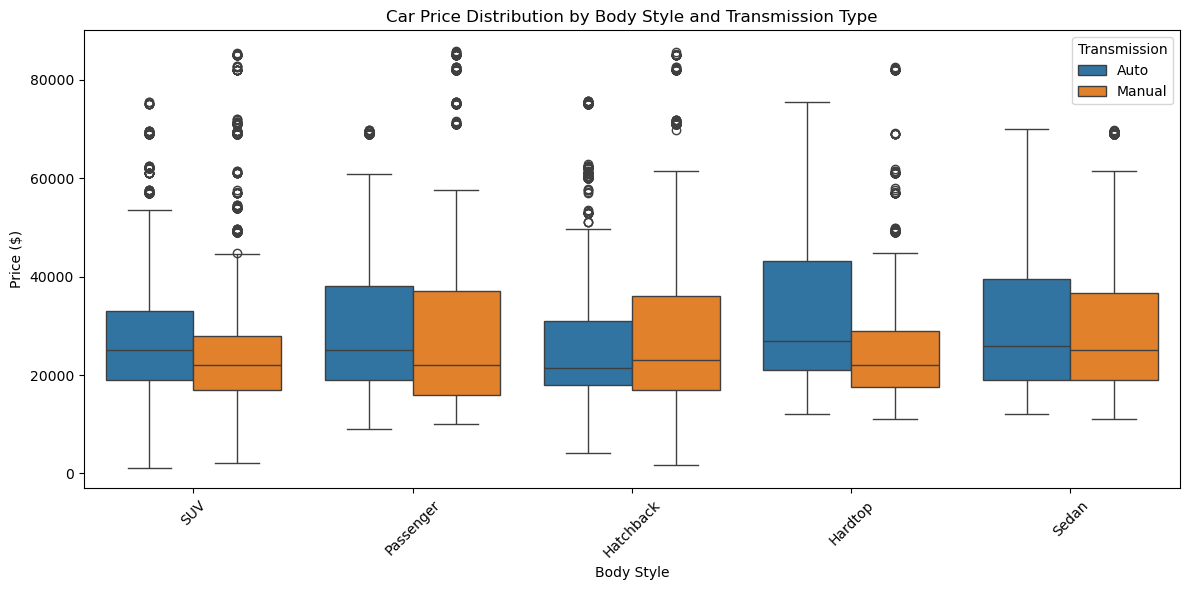

In [344]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type


# Plot price distribution by Body Style and Transmission
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission')

plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xlabel("Body Style")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


               Price ($)  Engine Size  Annual Income
Price ($)       1.000000          NaN       0.012065
Engine Size          NaN          NaN            NaN
Annual Income   0.012065          NaN       1.000000


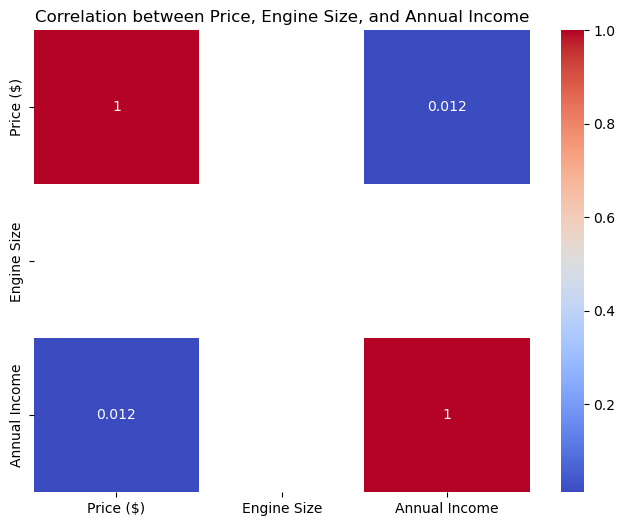

In [342]:
#14.What is the correlation between car price, engine size, and annual income of customers, and how do these features interact

df['Engine Size'] = df['Engine'].str.extract('(\d+)').astype(float)

# Select relevant columns
data = df[['Price ($)', 'Engine Size', 'Annual Income']]

# Compute correlation matrix
correlation = data.corr()
print(correlation)

# Plot heatmap for visualization
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation between Price, Engine Size, and Annual Income")
plt.show()

In [338]:
#15. How does the average car price vary across different car models and engine types?

avg_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

# Rename column for clarity
avg_price_by_model_engine.rename(columns={'Price ($)': 'Average Price ($)'}, inplace=True)

# Display the result
avg_price_by_model_engine

,Model,Engine,Average Price ($)
0,3-Sep,DoubleÂ Overhead Camshaft,37986.380117
1,3000GT,DoubleÂ Overhead Camshaft,22764.326923
2,3000GT,Overhead Camshaft,21770.659864
3,300M,DoubleÂ Overhead Camshaft,21394.888889
4,323i,DoubleÂ Overhead Camshaft,16744.632287
...,...,...,...
256,Windstar,Overhead Camshaft,17100.272727
257,Wrangler,DoubleÂ Overhead Camshaft,21145.294737
258,Wrangler,Overhead Camshaft,18742.942029
259,Xterra,DoubleÂ Overhead Camshaft,15940.459459


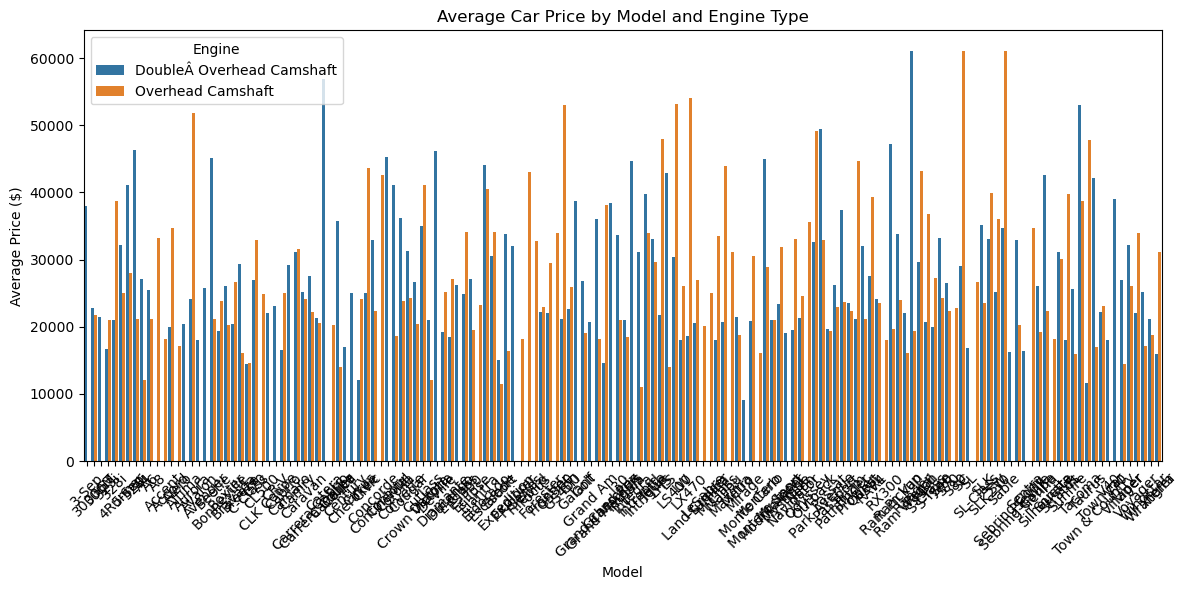

In [340]:
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_model_engine, x='Model', y='Average Price ($)', hue='Engine')
plt.title("Average Car Price by Model and Engine Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



EDA - 3 - Amazon Sales




In [514]:
df3 = pd.read_csv('amazon.csv')

# Clean dataset
df3['discounted_price'] = df3['discounted_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
df3['actual_price'] = df3['actual_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
df3['discount_percentage'] = df3['discount_percentage'].replace({'%': ''}, regex=True).astype(float)
df3['rating'] = pd.to_numeric(df3['rating'], errors='coerce')
df3['rating_count'] = df3['rating_count'].replace({',': ''}, regex=True)
df3['rating_count'] = pd.to_numeric(df3['rating_count'], errors='coerce')
df3['main_category'] = df3['category'].apply(lambda x: x.split('|')[0] if pd.notnull(x) else x)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

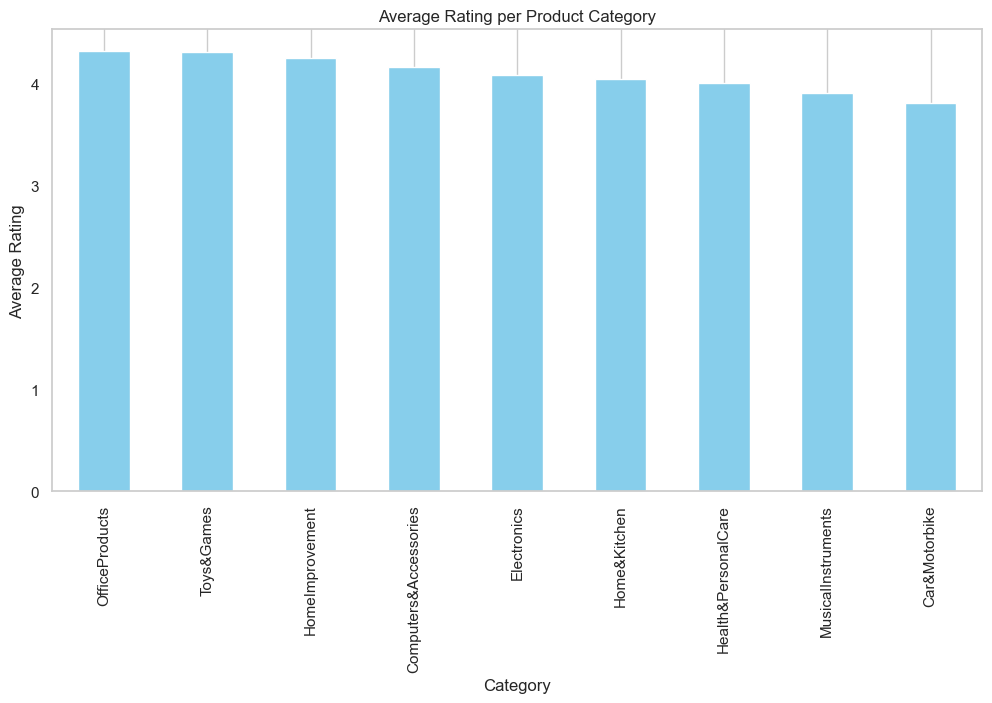

main_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Home&Kitchen             4.040716
Health&PersonalCare      4.000000
MusicalInstruments       3.900000
Car&Motorbike            3.800000
Name: rating, dtype: float64

In [528]:
#1. What is the average rating for each product category

avg_rating_per_category = df3.groupby('main_category')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
avg_rating_per_category.plot(kind='bar', color='skyblue')
plt.title('Average Rating per Product Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()
avg_rating_per_category

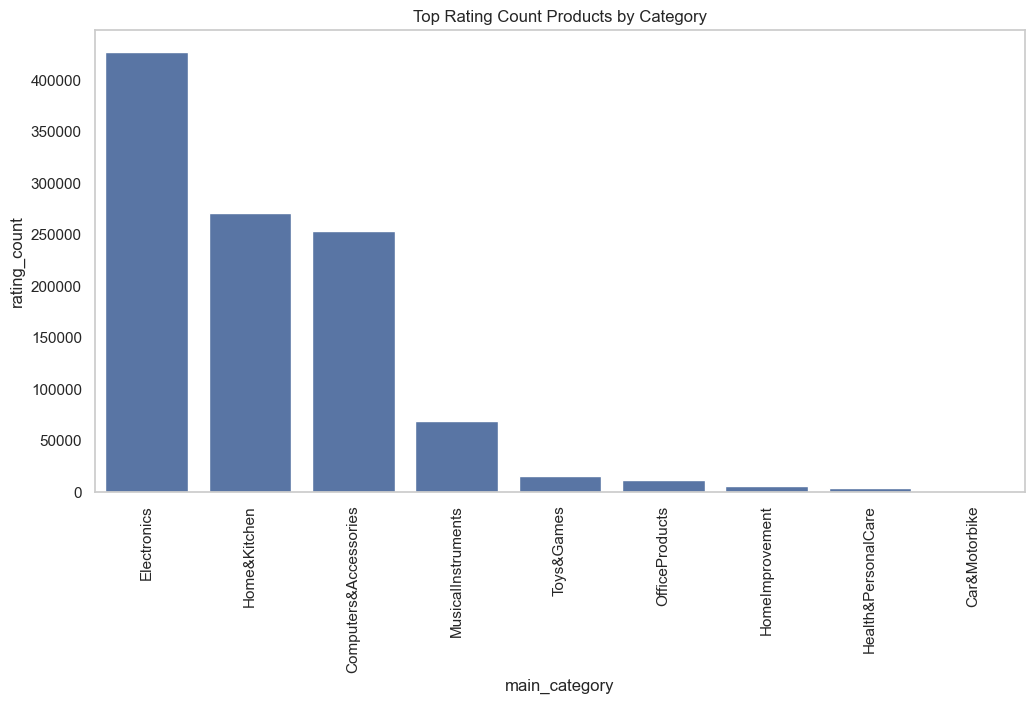

,main_category,product_name,rating_count
12,Electronics,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0
1028,Home&Kitchen,Pigeon Polypropylene Mini Handy and Compact Ch...,270563.0
588,Computers&Accessories,SanDisk Cruzer Blade 32GB USB Flash Drive,253105.0
613,MusicalInstruments,Boya ByM1 Auxiliary Omnidirectional Lavalier C...,68664.0
924,Toys&Games,Faber-Castell Connector Pen Set - Pack of 25 (...,15867.0
659,OfficeProducts,Casio FX-82MS 2nd Gen Non-Programmable Scienti...,12179.0
982,HomeImprovement,"Gizga Essentials Cable Organiser, Cord Managem...",5985.0
1247,Health&PersonalCare,Dr Trust Electronic Kitchen Digital Scale Weig...,3663.0
1157,Car&Motorbike,Reffair AX30 [MAX] Portable Air Purifier for C...,1118.0


In [530]:
#2. What are the top rating_count products by category

top_rated_products_by_category = df3.sort_values('rating_count', ascending=False).groupby('main_category').head(1)
plt.figure(figsize=(12,6))
sns.barplot(x='main_category', y='rating_count', data=top_rated_products_by_category)
plt.title('Top Rating Count Products by Category')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()
top_rated_products_by_category[['main_category', 'product_name', 'rating_count']]

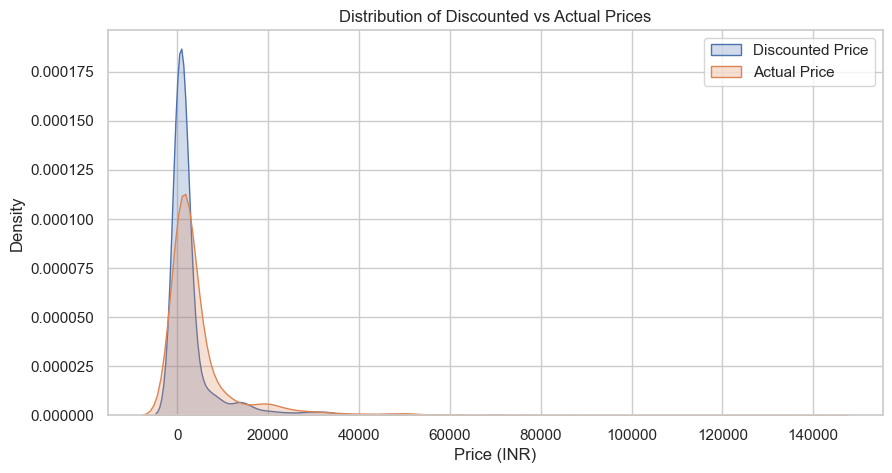

In [532]:
#3.  What is the distribution of discounted prices vs. actual prices

price_distribution = df3[['discounted_price', 'actual_price']].dropna()
plt.figure(figsize=(10,5))
sns.kdeplot(x=price_distribution['discounted_price'], label='Discounted Price', fill=True)
sns.kdeplot(x=price_distribution['actual_price'], label='Actual Price', fill=True)
plt.title('Distribution of Discounted vs Actual Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

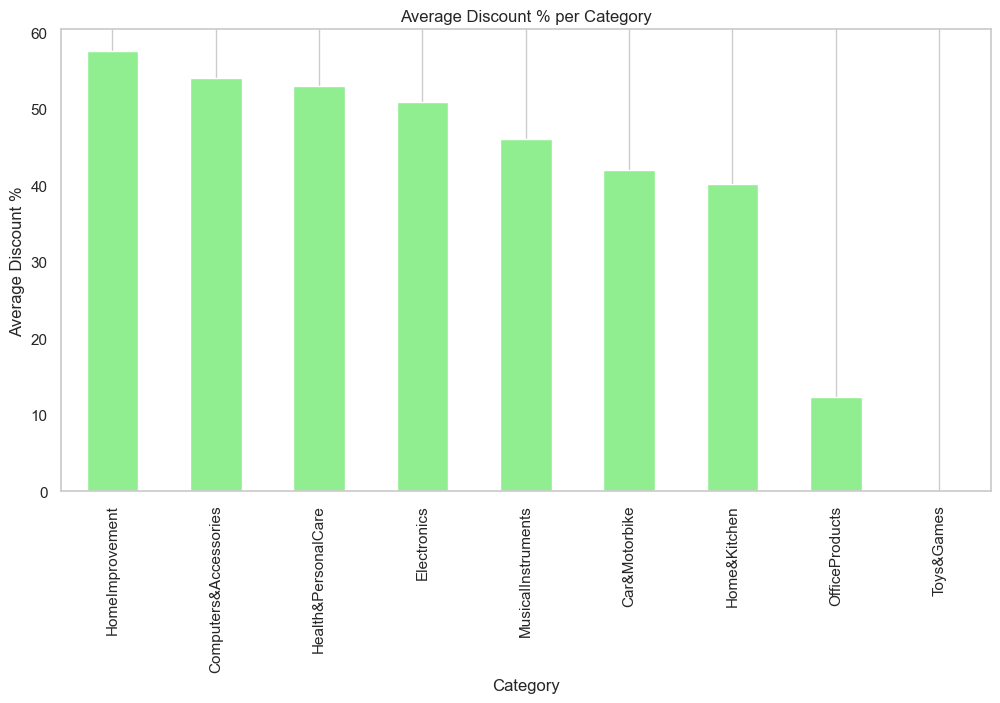

main_category
HomeImprovement          57.500000
Computers&Accessories    54.024283
Health&PersonalCare      53.000000
Electronics              50.828897
MusicalInstruments       46.000000
Car&Motorbike            42.000000
Home&Kitchen             40.120536
OfficeProducts           12.354839
Toys&Games                0.000000
Name: discount_percentage, dtype: float64

In [534]:
#4. How does the average discount percentage vary across categoriesk

avg_discount_per_category = df3.groupby('main_category')['discount_percentage'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
avg_discount_per_category.plot(kind='bar', color='lightgreen')
plt.title('Average Discount % per Category')
plt.xlabel('Category')
plt.ylabel('Average Discount %')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()
avg_discount_per_category


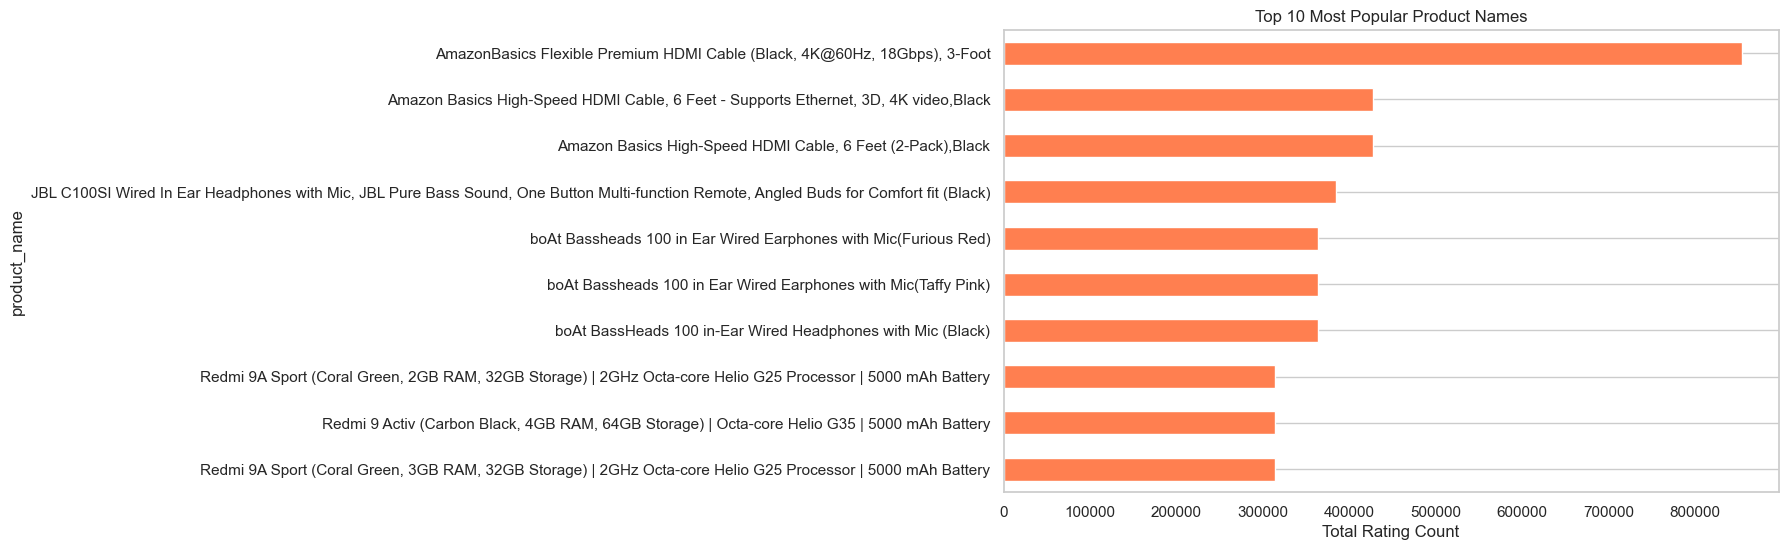

product_name
AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot                                                                  853945.0
Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black                                                        426973.0
Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black                                                                                 426973.0
JBL C100SI Wired In Ear Headphones with Mic, JBL Pure Bass Sound, One Button Multi-function Remote, Angled Buds for Comfort fit (Black)    385177.0
boAt Bassheads 100 in Ear Wired Earphones with Mic(Furious Red)                                                                            363713.0
boAt Bassheads 100 in Ear Wired Earphones with Mic(Taffy Pink)                                                                             363713.0
boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black)                                        

In [536]:
#5. What are the most popular product names

popular_product_names = df3.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)
popular_product_names.plot(kind='barh', color='coral', figsize=(10,6))
plt.xlabel('Total Rating Count')
plt.title('Top 10 Most Popular Product Names')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()
popular_product_names


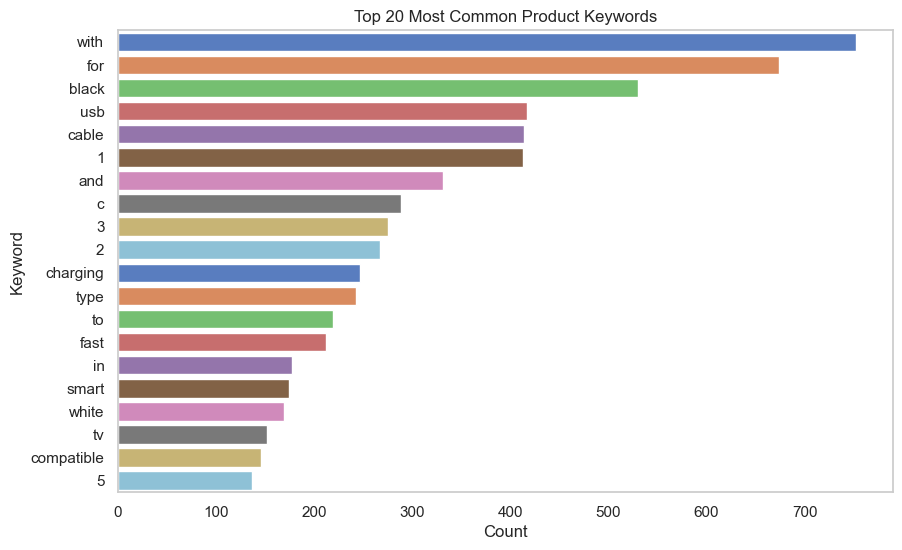

,Keyword,Count
0,with,752
1,for,674
2,black,530
3,usb,417
4,cable,414
5,1,413
6,and,331
7,c,289
8,3,275
9,2,267


In [538]:
#6. What are the most popular product keywords

from collections import Counter
import re

words = ' '.join(df3['product_name']).lower()
words = re.findall(r'\w+', words)
common_words = Counter(words).most_common(20)
keywords_df = pd.DataFrame(common_words, columns=['Keyword', 'Count'])

plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Keyword', data=keywords_df, palette='muted')
plt.title('Top 20 Most Common Product Keywords')
plt.xlabel('Count')
plt.grid(axis='x')
plt.show()
keywords_df


In [540]:
#7. What are the most popular product reviewsk

popular_reviews = df3[['review_title', 'review_content', 'rating_count']].sort_values('rating_count', ascending=False).head(10)
popular_reviews

,review_title,review_content,rating_count
12,"It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,426973.0
65,"It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,426973.0
47,"It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,426973.0
684,"It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,426972.0
400,"Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,363713.0
352,"Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,363713.0
584,"Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,363711.0
370,"Best phone for below normal use,Good mobile fo...",If you want a smart phone for just the use of ...,313836.0
371,"Best phone for below normal use,Good mobile fo...",If you want a smart phone for just the use of ...,313836.0
473,"Best phone for below normal use,Good mobile fo...",If you want a smart phone for just the use of ...,313832.0


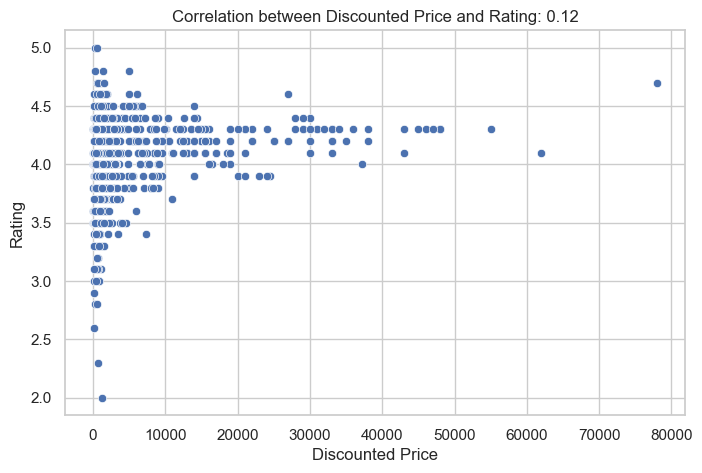

0.12033741712288537

In [542]:
#8. What is the correlation between discounted_price and ratingk

correlation = df3['discounted_price'].corr(df3['rating'])
plt.figure(figsize=(8,5))
sns.scatterplot(x='discounted_price', y='rating', data=df3)
plt.title(f'Correlation between Discounted Price and Rating: {correlation:.2f}')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()
correlation

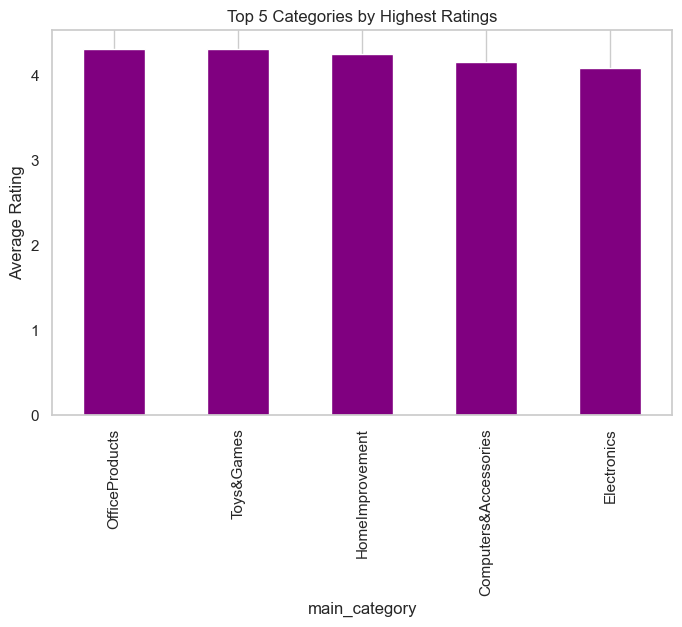

main_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Name: rating, dtype: float64

In [544]:
#9.  What are the Top 5 categories based on the highest ratings

top_5_categories_by_rating = avg_rating_per_category.head(5)
top_5_categories_by_rating.plot(kind='bar', color='purple', figsize=(8,5))
plt.title('Top 5 Categories by Highest Ratings')
plt.ylabel('Average Rating')
plt.grid(axis='y')
plt.show()
top_5_categories_by_rating

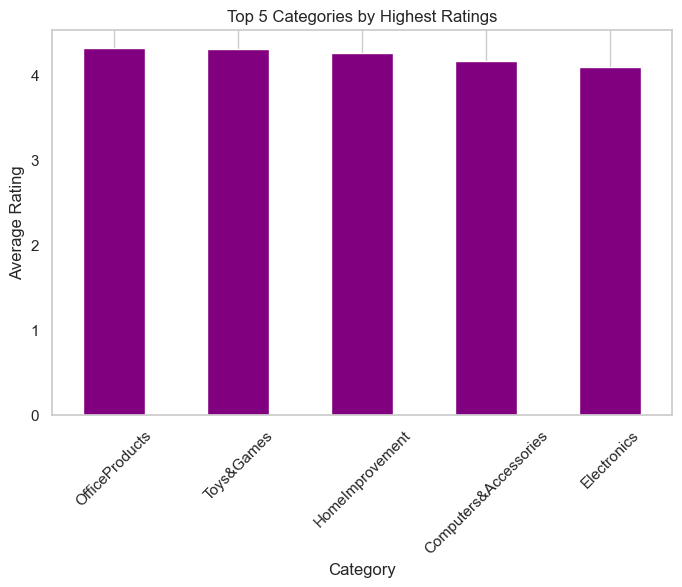

main_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Name: rating, dtype: float64

In [546]:
# 10. Group by main category and calculate average rating
avg_rating_per_category = df3.groupby('main_category')['rating'].mean().sort_values(ascending=False)

# Take the Top 5
top_5_categories_by_rating = avg_rating_per_category.head(5)

# Plot it
top_5_categories_by_rating.plot(kind='bar', color='purple', figsize=(8,5))
plt.title('Top 5 Categories by Highest Ratings')
plt.ylabel('Average Rating')
plt.xlabel('Category')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

# Show data
top_5_categories_by_rating


EDA 4 - Spotify

In [484]:
# Read the dataset
df4 = pd.read_csv('spotify.csv')

# Check for null values
null_values = df4.isnull().sum()

#Q1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

# Handle null values if present
if null_values.any():
    df4 = df4.dropna()

# Check for duplicate rows
duplicate_rows = df4.duplicated().sum()

# Drop duplicate rows if present
if duplicate_rows > 0:
    df4 = df4.drop_duplicates()

df4.shape

(413, 5)

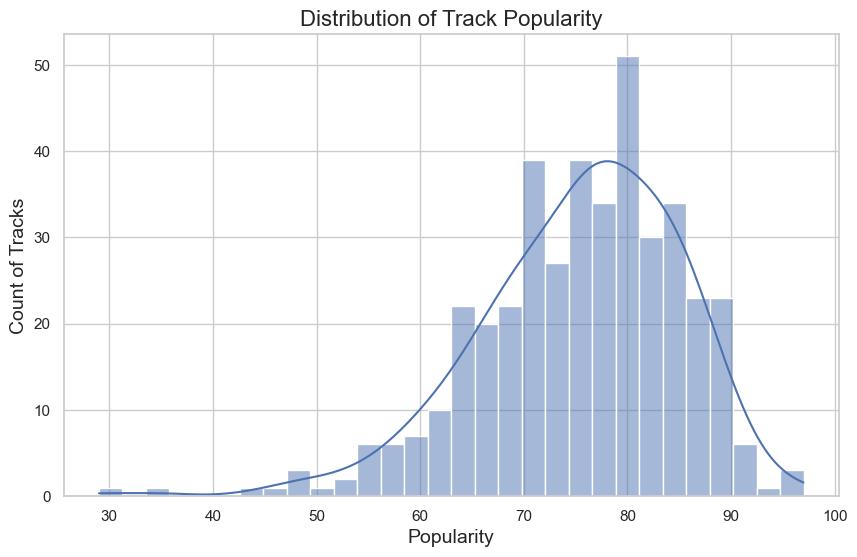

In [486]:
#Q2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram


plt.figure(figsize=(10,6))
sns.histplot(df4['Popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Count of Tracks', fontsize=14)
plt.grid(True)
plt.show()

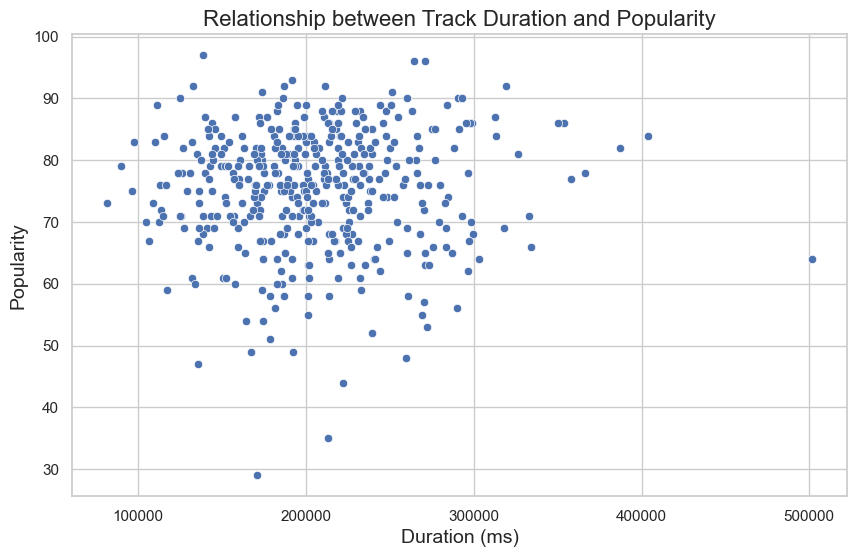

In [502]:
#Q3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df4)
plt.title('Relationship between Track Duration and Popularity', fontsize=16)
plt.xlabel('Duration (ms)', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.grid(True)
plt.show()



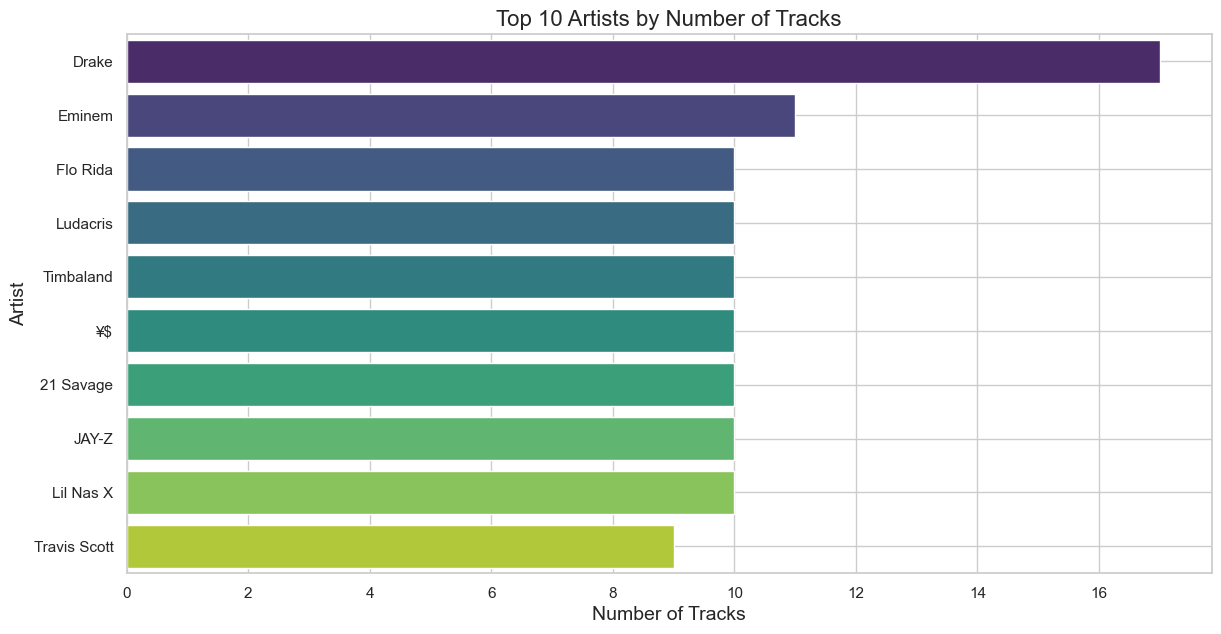

In [490]:
#Q4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

plt.figure(figsize=(14,7))
top_artists = df4['Artist'].value_counts().head(10)
sns.countplot(y='Artist', data=df4, order=top_artists.index, palette='viridis')
plt.title('Top 10 Artists by Number of Tracks', fontsize=16)
plt.xlabel('Number of Tracks', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.grid(True)
plt.show()

In [492]:
# Q5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
least_popular_tracks = df4.sort_values(by='Popularity').head(5)[['Artist', 'Track Name', 'Popularity']]
least_popular_tracks
    

,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


In [494]:
#Q6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

top_5_artists = df4['Artist'].value_counts().head(5).index.tolist()
top_5_df = df4[df4['Artist'].isin(top_5_artists)]
average_popularity = top_5_df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
average_popularity

Artist
Eminem       83.636364
Drake        82.882353
Flo Rida     78.000000
Timbaland    69.000000
Ludacris     63.000000
Name: Popularity, dtype: float64

In [496]:
#Q7.  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

most_popular_tracks = top_5_df.loc[top_5_df.groupby('Artist')['Popularity'].idxmax()][['Artist', 'Track Name', 'Popularity']]
most_popular_tracks

,Artist,Track Name,Popularity
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92
80,Eminem,Without Me,90
300,Flo Rida,Low (feat. T-Pain),84
371,Ludacris,My Chick Bad,67
380,Timbaland,The Way I Are,85


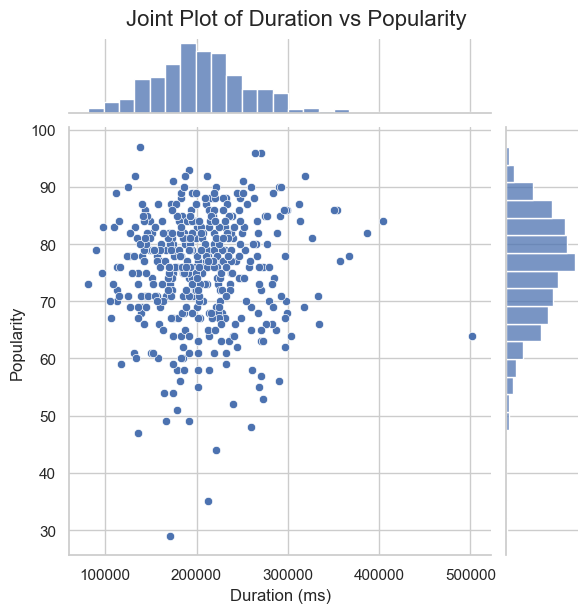

In [508]:
#8. Visualize relationships between multiple numerical variables simultaneously using a pair plot

sns.jointplot(x='Duration (ms)', y='Popularity', data=df4, kind='scatter')
plt.suptitle('Joint Plot of Duration vs Popularity', y=1.02, fontsize=16)
plt.show()

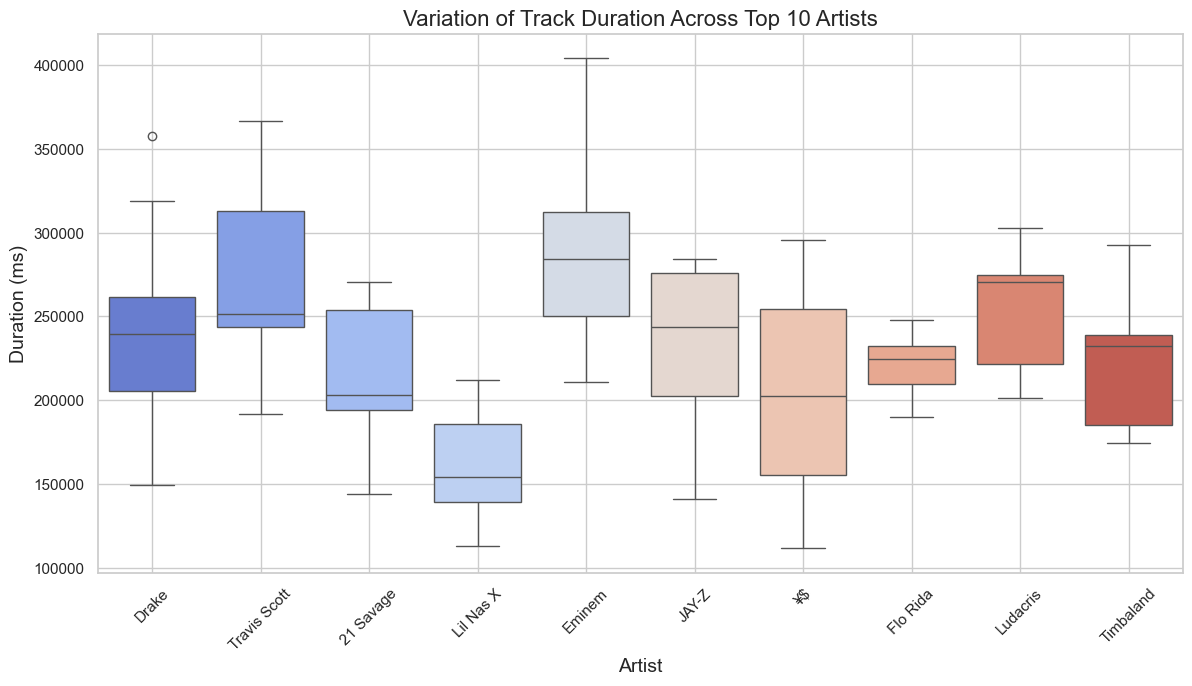

In [506]:
#Q9.  Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

top_artists_for_duration = df4['Artist'].value_counts().head(10).index.tolist()
plt.figure(figsize=(14,7))
sns.boxplot(x='Artist', y='Duration (ms)', data=df4[df4['Artist'].isin(top_artists_for_duration)], palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Variation of Track Duration Across Top 10 Artists', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Duration (ms)', fontsize=14)
plt.grid(True)
plt.show()

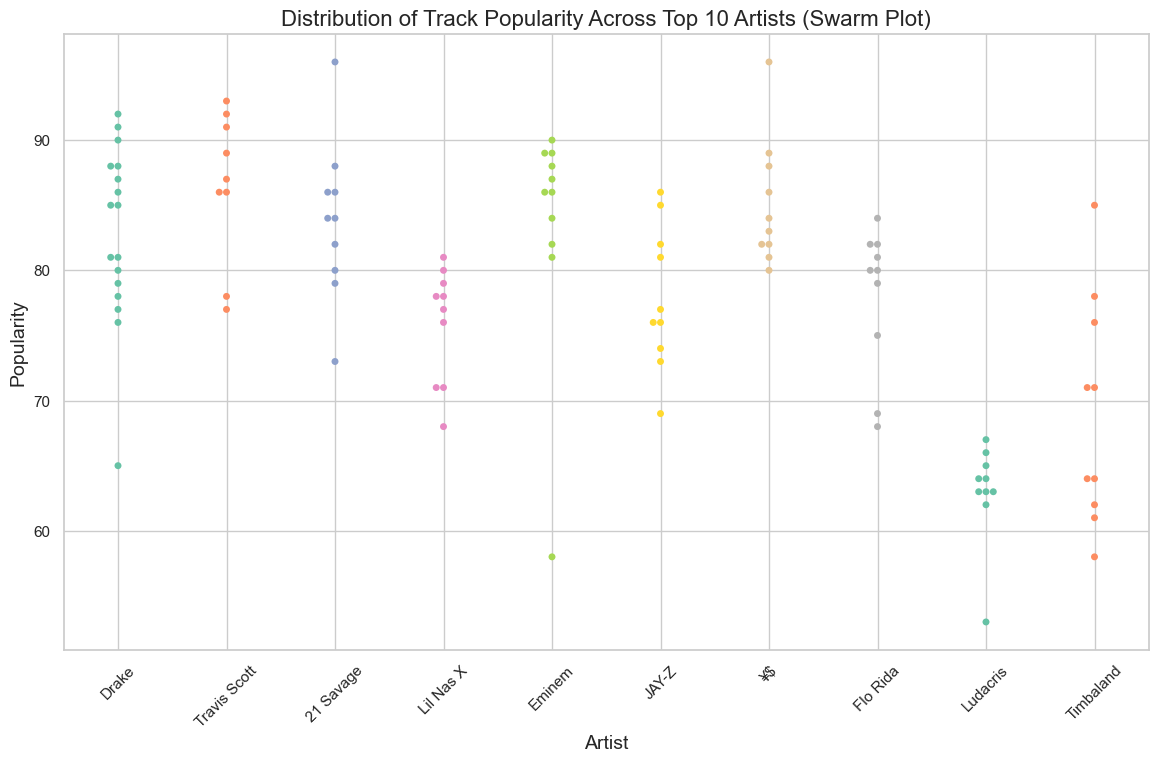

In [510]:
#10: Distribution of Track Popularity by Different Artists - Swarm Plot

# Focusing on top artists for clarity
top_artists_for_swarm = df4['Artist'].value_counts().head(10).index.tolist()

plt.figure(figsize=(14,8))
sns.swarmplot(x='Artist', y='Popularity', data=df4[df4['Artist'].isin(top_artists_for_swarm)], palette='Set2')
plt.xticks(rotation=45)
plt.title('Distribution of Track Popularity Across Top 10 Artists (Swarm Plot)', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.grid(True)
plt.show()
